<div style="border: 6px solid #FFEE00; border-radius: 10px; padding: 10px; background-color: #001F2D; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h1 style="font-family: 'Arial', serif; color: #FFFF00; text-align: center;">Homework: Review of Regression and Starting Linear Algebra</h1>
</div>

Belieu, Joshua Alan;

<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 1: Radial Basis Function Neural Networks</h2>
</div>

In this class we have seen curve smoothing (e.g., LOESS), finding trend lines, and regression. Another related idea is that of _interpolation_. Interpolation differs from the others in that the goal is to estimate values between the data points while always preserving the values at the data points. The data points are assumed to be error/noise free. 

Here is an example of interpolating many points with three different models. The simplest is linear: one draws a straight line between adjacent points. 

<img src="https://images.squarespace-cdn.com/content/v1/5acbdd3a25bf024c12f4c8b4/1600108001315-TJ7TU69HSVHHTCDEHMQ3/Screen+Shot+2020-09-14+at+11.24.43+AM.png" alt="interp" style="width:30%; max-width: 100%; height:auto;">

Note that these interpolation models are polynomials, which is fairly common. You might have done this before; however, polynomials can have rather bad behavior in some cases. In this example, look at the interpolation between the right-most two points: do you trust those estimates? Polynomials also always go to infinity at large values of their argument (positive or negative), which means they will always behave badly outside of the range of the data. (Technically, this is _extrapolation_, but still something to be cautious of.) And, what if our data lives in $100$ dimensions? 

Another approach is the use of radial basis functions, which model the data as

$$y = \sum_d A_d e^{-(x - x_d)^2/2\sigma^2}.$$

We have seen these before in this course. (And, by the way, there are many slides on this that I didn't get to in the lecture on linear regression.) 

Consider a dataset with only two points: $(\pi/2,1)$ and $(3\pi/2,-1)$. The distance between these points is $\pi$, so let's take $\sigma = \pi/2$. Place the radial basis functions at the data points. 

Solve for the $\{A_d\}$, plot the data in the range $[0,2\pi]$, plot your result and plot $\sin(x)$. Does your model go perfectly through the data points? 

_Hint:_ There are many ways to approach this, but to connect our linear regression derivation, I recommend first noting that for two data points we only have $A_1$ and $A_2$ and we can solve for these using simple algebra. Do that first. Then, with these expressions, insert the values for $x_d$ and $\sigma$ to get the $A$'s. You now have everything you need.  What would you do if you had three datapoints or more? 

We are looking for :

$$
\bar{y}=A_1e^{-(x-x_1)^2/2\sigma^2}+A_2e^{-(x-x_2)^2/2\sigma^2},\quad x_i\in x_d
$$

When we apply this to our given dataset :

$$
y_1 = A_1e^{-(x_1-x_1)^2/2\sigma^2}+A_2e^{-(x_1-x_2)^2/2\sigma^2}=A_1+A_2e^{-(\Delta x)^2/2\sigma^2}\equiv A_1+cA_2
$$

$$
y_2 = A_1e^{-(x_2-x_1)^2/2\sigma^2}+A_2e^{-(x_2-x_2)^2/2\sigma^2}=A_2+A_1e^{-(\Delta x)^2/2\sigma^2}\equiv A_2+cA_1
$$

$$
\implies \bar{y}\doteq \begin{bmatrix}y_1\\y_2\end{bmatrix}=\begin{bmatrix}1&c\\c&1\end{bmatrix}\begin{bmatrix}A_1\\A_2\end{bmatrix}
$$

Forming the augmented matrix,

$$
\left[ \begin{array}{cc|c}1 & c & 1 \\c & 1 & -1 \\\end{array}\right]\sim
\left[ \begin{array}{cc|c}1 & c & 1 \\0 & 1-c^2 & -(1+c) \\\end{array}\right]\sim
\left[ \begin{array}{cc|c}1 & c & 1 \\0 & 1 & -\frac{(1+c)}{1-c^2} \\\end{array}\right]=
\left[ \begin{array}{cc|c}1 & c & 1 \\0 & 1 & -\frac{1}{1-c} \\\end{array}\right]\sim
$$
$$
\left[ \begin{array}{cc|c}1 & 0 & 1+\frac{c}{1-c} \\0 & 1 & -\frac{1}{1-c} \\\end{array}\right]=
\left[ \begin{array}{cc|c}1 & 0 & \frac{1}{1-c} \\0 & 1 & -\frac{1}{1-c} \\\end{array}\right].
$$

That is, $A_1,A_2\equiv A_{\pm}=\pm\frac{1}{1-c}$. I will use python from here to make calculations.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi

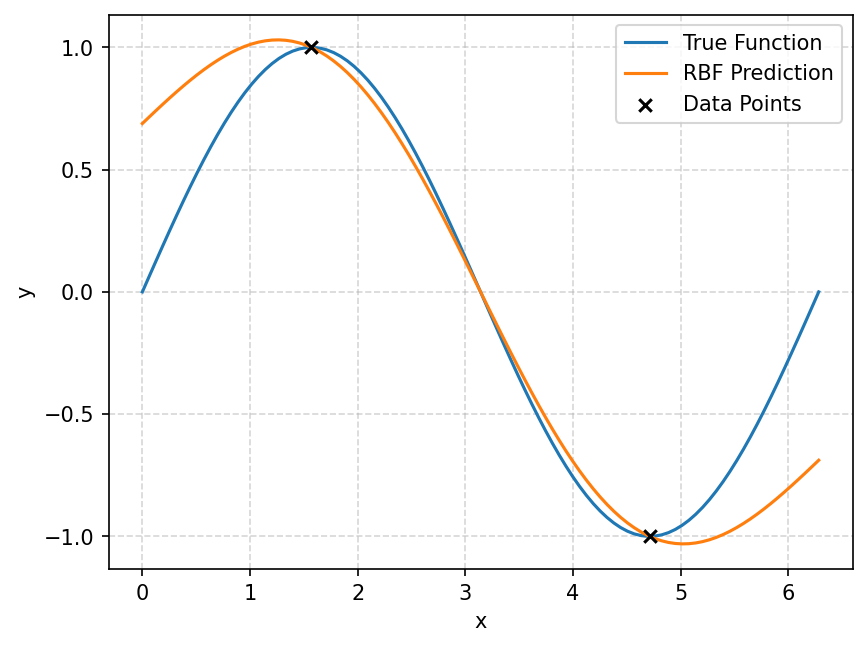

In [2]:

x_d = np.array([pi/2,3*pi/2])
y_d = np.array([1,-1])

sigma = pi/2
gamma = 1/(2*sigma**2)
c = np.exp(-gamma * (x_d[0] - x_d[1])**2)

A_p = 1/(1-c)
A_m = -1 * A_p
x = np.linspace(0, 2*pi, 100)

y_pred = np.array([A_p * np.exp(-gamma * (xv - x_d[0])**2) + A_m * np.exp(-gamma * (xv - x_d[1])**2) for xv in x ])

plt.figure(dpi=150)
plt.plot(x,np.sin(x),label='True Function')
plt.plot(x,y_pred, label='RBF Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_d,y_d,color='black',label='Data Points',marker='x',zorder=5)
plt.grid(ls='--',alpha=0.5)
plt.legend()
plt.show()

No!


<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 2: Regression with Two Features</h2>
</div>

In a previous HW you derived the equations for the slope and intercept for univariate linear regression, and connected the results to statistical properties of the data. Here, "univariate" refers to the fact that there was one variable, $x$, that represented some single feature. In this problem you are going to generalize this result to the multivariate case, but we are moving in baby steps so we'll only attempt the bivariate case. 

Consider a dataset with two features and we wish to make predictions using linear regression given some data on these two features. We take our model to be

$$y = w_1x_1 + w_2x_2.$$

There could be a bias term $w_0$ but we assume that a transformation has been carried to remove this bias. (In reality, I did this so that you only have two unknowns $w_1$ and $w_2$.) Here, $x_1$ is one of the features, such as height, and $x_2$ is a different feature, such as weight. This is a much more interesting and useful model!

Write down the loss function $L(w_1, w_2)$ for this case, assuming a mean-squared error (as we have mostly done so far in this course). Using partial derivatives, find the equations for the minimum and give explicit expressions for $w_1$ and $w_2$. Discuss how this case differs from the univariate case and what new statistical quantities have appeared.

Be sure to give **a lot** of mathematical detail using $\LaTeX$. Do not skip any steps. Add commentary on your steps. 


We begin with the mean squared error (MSE) form of the loss function :

$$
\mathcal{L}\equiv (\bar{y}-y)^2=\sum_i(\bar{y}_i-y_i)^2=\sum_i(\bar{y}_i-(w_1x_{1i}+w_2x_{2i}))^2
$$
$$
\implies \frac{\partial \mathcal{L}}{\partial w_j}=\frac{\partial}{\partial w_j}\left[\sum_i(\bar{y}_i-w_kx_{ki})^2\right]=2\sum_i(\bar{y}_i-w_kx_{ki})\frac{\partial}{\partial w_j}\left[\bar{y}_i-w_kx_{ki}\right]=-2\sum_i(\bar{y}_i-w_kx_{ki})\delta_{j,k}x_{ki}
$$
Where I have used Einstein notation for convencience in the numerical model.
$$
\implies \frac{\partial \mathcal{L}}{\partial w_1}=-2\sum_i(\bar{y}_ix_{1i}-w_1x_{1i}^2-w_2x_{1i}x_{2i})\equiv-2(M_{1y}-w_1M_{11}-w_2M_{12})\quad\text{similarily,}
$$
$$
\implies \frac{\partial \mathcal{L}}{\partial w_2}=-2\sum_i(\bar{y}_ix_{1i}-w_2x_{2i}^2-w_1x_{1i}x_{2i})\equiv-2(M_{2y}-w_1M_{12}-w_2M_{22})
$$

Making the equality of the derivatives to zero allows us to cast this system of equations into a nice matrix form,

$$
\bar{M_y}\doteq\begin{bmatrix}M_{1y}\\ M_{2y}\end{bmatrix}=M\bar{w}\doteq\begin{bmatrix}M_{11}&M_{12}\\ M_{21}&M_{22}\end{bmatrix}\begin{bmatrix}w_1\\ w_2\end{bmatrix}
$$

Before moving on it is important to notice that $M_{21}=M_{12}$ as their defintions are merely pointwise products of each vector's elements (a dot product). So, $M_{21}=M_{12}\equiv M_{s}$. To make my life easier I will also impose notational changes : $M_{11}=a,M_{s}=b,M_{22}=c,M_{1y}=d, M_{2y}=e$. Because we are looking at a nice 2x2 system I will try and save time and assume $M$ is non-singular :

$$
M\bar{w}=\bar{M}_y\implies \bar{w}=M^{-1}\bar{M}_y\doteq|M|^{-1}\begin{bmatrix}c & -b\\ -b & a \end{bmatrix}M_y=\frac{1}{ac-b^2}\begin{bmatrix}c & -b\\ -b & a \end{bmatrix}\begin{bmatrix}d\\ e \end{bmatrix}
$$
Multiplying this all out,
$$
\bar{w}=
\frac{1}{ac-b^2}
\begin{bmatrix}
cd - be\\
ae - bd
\end{bmatrix}.
$$
$$
w_1 = \frac{cd - be}{ac - b^2}=\frac{cd - be}{ac - b^2}=\frac{M_{22}M_{1y}-M_{12}M_{2y}}{M_{11}M_{22}-M_{12}^2}
$$
$$
w_2 = \frac{ae - bd}{ac - b^2}   =\frac{M_{11}M_{2y}-M_{12}M_{1y}}{M_{11}M_{22}-M_{12}^2}
$$

$$
\implies w_i=\frac{M_{ii}M_{jy}-M_{ij}M_{iy}}{M_{ii}M_{jj}-M_{ij}^2} \quad \forall i \neq j
$$
Where now if I perform a linear transformation that makes all features have a mean of 0 then,
$$
\text{Cov}[x_i,x_j]=\frac{1}{n}\Sigma x_{1i}x_{1j}=M_{ij}/n \quad \text{Cov}[x_i,y]=\frac{1}{n}\Sigma x_{1i}y=M_{iy}/n\quad \forall i,j\neq y
$$

This finally leaves,

$$
w_i=\frac{\text{Cov}[x_i,x_i]\text{Cov}[x_i,y]-\text{Cov}[x_i,x_j]\text{Cov}[x_j,y]}{\text{Cov}[x_i,x_i]\text{Cov}[x_j,x_j]-\text{Cov}[x_i,x_j]\text{Cov}[x_i,x_j]}
=\frac{\text{Var}[x_i]\text{Cov}[x_i,y]-\text{Cov}[x_i,x_j]\text{Cov}[x_j,y]}{\text{Var}[x_i]\text{Var}[x_j]-\text{Cov}[x_i,x_j]^2}\quad\forall i\neq j
$$

Where we can see the main difference between monovariate and multivariate is that we must consider the coviariance of the features as well.

<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 3: Linear Algebra Preparation</h2>
</div>

In this problem you are going to explore multiplication. Do you know how to multiply? 

Let's keep it simple today and only talk about commutativty.  For example, is $3\cdot 4 = 4 \cdot 3$? Why or why not?

These rules, with associativity and distribution, are part of an algebra we define. And, you can invent your own! Sometimes we need to rethink these rules when new objects become useful. 

In data science, two objects of great use are vectors and matrices. These are like numbers but they package together a bunch of numbers together. This makes a lot of sense for data science where we almost always have a data sample with several features. For example, a person might have [age, height, salary, weight]. Or, we might think about this in terms of samples within a feature, such as [age1, age2, age3, ....], where agen is the age of person/sample n; organizing this way can be useful to computing statistics of the features. 

When we create these new mathematical objects, we need to rethink rules like commutativity. In fact, it is immediately obvious how to multiply something like [age, height, salary, weight]. How would you do this? For example, how would you square [age, height, salary, weight]? 

If you didn't come up with a good answer it is because there isn't one. In fact, there are two. In linear algebra, we will write these objects as vectors:
$${\bf v} = \begin{pmatrix} age \\ height \\ salary \\ weight  \end{pmatrix} $$
If you have encountered vectors before you might know of a rule to multiply them, which is to sum the squares of each entry. Let's make this more formal by defining the **inner product** as

$$\mathbf{v}^T \mathbf{v} =  \begin{pmatrix} age & height & salary & weight  \end{pmatrix}  \begin{pmatrix} age \\ height \\ salary \\ weight  \end{pmatrix} $$

where the **transpose** 

$${\bf v}^T = \begin{pmatrix} age & height & salary & weight  \end{pmatrix}$$

has been used. We can write this as ${\bf v}^T{\bf v}$. Our rule of multiplication is then: move entry by entry through ${\bf v}^T$ and ${\bf v}$ multipying each of the entries and adding those results as we go. Think of this rule: move across the columns of the left object as you move down the columns of the right object. Prove to yourself that this yields

$$ age^2  + height^2 +  salary^2 + weight^2 .$$

That is one way to multiply vectors! Now, here is the question: does this commute? That is, does ${\bf v}^T{\bf v} = {\bf v}{\bf v}^T$? What do you think? Let's look at what this means:

$$ \begin{pmatrix} age \\ height \\ salary \\ weight  \end{pmatrix} \begin{pmatrix} age & height & salary & weight  \end{pmatrix}  $$

Note that if we apply our column rule we will not get the same result! Multiplication of vectors does not commute! Too bad we spent our entire lives getting very comfortable with that rule! This case is referred to as the **outer product** and it plays an outsized role in data science. An outer product creates something new: a **matrix**. This is what it looks like:

$$
{\cal M} = \mathbf{v} \mathbf{v}^T = \begin{pmatrix} 
\text{age} \cdot \text{age} & \text{age} \cdot \text{height} & \text{age} \cdot \text{salary} & \text{age} \cdot \text{weight} \\
\text{height} \cdot \text{age} & \text{height} \cdot \text{height} & \text{height} \cdot \text{salary} & \text{height} \cdot \text{weight} \\
\text{salary} \cdot \text{age} & \text{salary} \cdot \text{height} & \text{salary} \cdot \text{salary} & \text{salary} \cdot \text{weight} \\
\text{weight} \cdot \text{age} & \text{weight} \cdot \text{height} & \text{weight} \cdot \text{salary} & \text{weight} \cdot \text{weight} \\
\end{pmatrix}
$$

This is a much larger object! Your task, using $\LaTeX$, figure out that mathematical rule that corresponds to "move entry by entry through ${\bf v}$ and ${\bf v}^T$ multipying each of the entries and adding those results as we go". That is, if we think of an element of ${\cal M}$ as ${\cal M}_{ij}$, where $i$ is the row and $j$ is the column, what is the inner product formula for an outer product? Use the result above to see the pattern. Imagine we need this formula so that can write a Python function that does this for us.

$${\cal M}_{ij} =  ???.$$

Later we will generalize this: if the outer product yields a matrix, then we will need to ask whether we can multiply matrices, whether that commutes and what the formula might be. But, that's for later....

$$
[\mathcal{M}]_{ij}=[\textbf{v}\textbf{v}^T]_{ij}=[v]_i[v]_j
$$

<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 4: Confounders and Linear Regression</h2>
</div>



Read Chapter 10 in your textbook and answer these questions in a markdown cell:

* What is a confounder?

    * A quantity which affects dependent and independent variables.

* What does it mean to control a confounder?

    * Find the correlation between a confounder and another quantity while keeping other variables constant. Then use this to inform your analysis.

* How can linear regression be used for this? 

    * For each confounder you can introduce a boolean variable which "activates" for the confounder you wish to control and the weight on that parameter dictates how much control you are exerting on the result.

* Summarize in detail the section **The Anatomy of a Regression**.

    * Essentially, one tries to model the correlation between a target variable, a set of dependent variables with associated coefficients, a bias, error, and control variable with associated control coefficient. This control coefficient parameter in practice can be indistinguishable from regular features. One only cares to perform a fit which minimizes the control variable's effect on the outcome. 

* Is social media bad for you? 

    * By the study, I  don't think so.

<div style="border: 2px solid #2980b9; border-radius: 10px; padding: 10px; background-color: #f4f6f7; margin-bottom: 15px; max-width: 100%; box-sizing: border-box;">
    <h2 style="font-family: 'Georgia', serif; color: #2c3e50; text-align: center;">Problem 5: Linear Algebra with Python</h2>
</div>



Next week we will start learning a bit on linear algebra. Linear algebra will seriously streamline everything we have done so far; for example, all of the problems above were designed as "two equations in two unknowns" to avoid linear algebra; once we have the linear algebra in place, we can not only handle all cases, but it will give us insights into the data we could not arrive at any other way.

It is useful to know how to do linear algebra in Python as well. Because linear algebra is so ubiquitous, it appears in numerous Python libraries. In this problem you will explore some of these so that you know where to find what you need. 

Using the internet, search for libraries and make a rough list of which libaries have linear algebra capabilities. For example, NumPy is [a very obvious example](https://numpy.org/doc/stable/reference/routines.linalg.html). My go-to for linear algebra is `linalg` in NumPy.  Note that there are many, many methods within this library - it is vast! What about Scipy? 

Write a list of some of the libraries you find. You will be using these libraries in the homework next week, mainly within `linalg`, so you might want to become familiar with that.

And, did you know you can do linear algebra **symbolically**? [Read this](https://docs.sympy.org/latest/modules/matrices/matrices.html). 

Here is an example you can play with:

List :

1] numpy

2] sympy

3] scipy

4] pandas

5] keras

6] theano

In [3]:
from sympy import Matrix
A = Matrix([[1, 2], [3, 4]])
A_inv = A.inv()  # Symbolic inverse

print(f"\nMy matrix is: \n{A}.")
print(f"\nMy matrix has inverse: \n{A_inv}.")
print(f"\nWe can show this by multiplying them to get the identity: \n{A*A_inv}.")


My matrix is: 
Matrix([[1, 2], [3, 4]]).

My matrix has inverse: 
Matrix([[-2, 1], [3/2, -1/2]]).

We can show this by multiplying them to get the identity: 
Matrix([[1, 0], [0, 1]]).


What is beautiful about all of these libraries is that you can write very short codes to build your intuition and check your thinking. 

Next, use an AI (e.g., ChatGPT 4o) to organize all of this knowledge you just collected. Write a prompt that organizes what you found in a way that makes it very clear what is available to you. I'll give an example and then you do it your way. Put your table in a markdown cell below. 

_I would like to organize Python libraries in terms of their use for doing linear algebra operations. I would like to organize by their capability, speed, whether they are symbolic (as in sympy), whether they are built around a numerical library or something else (e.g., live within a machine learning ecosystem). I would like to have this organized as a table. Please produce the table in markdown so that I can copy and paste into a markdown cell in a Jupyter notebook. Finally, suggest one super interesting fact about the use of linear algebra in data science._

I used ChatGPT 5.0 [3.11.25] for this portion.

| Library | Primary Use / Focus | Type of Computation | Linear Algebra Capabilities | Speed / Performance | Ecosystem / Built On | Notes |
|----------|--------------------|---------------------|-----------------------------|---------------------|----------------------|--------|
| **NumPy** | Core numerical computing and array manipulation | **Numeric** (floating point, dense arrays) | Excellent support for vector/matrix operations, dot products, decompositions via `numpy.linalg` | Very fast (C/Fortran under the hood, BLAS/LAPACK optimized) | Core scientific stack; base layer for SciPy, Pandas, and ML frameworks | Foundation for almost all numerical linear algebra in Python |
| **SymPy** | Symbolic mathematics | **Symbolic** (exact algebraic manipulation) | Symbolic matrices, exact solutions, determinants, eigenvalues, simplifications | Slower (pure Python, not compiled) | Self-contained symbolic algebra system | Great for deriving or verifying algebraic formulas analytically |
| **SciPy** | Advanced scientific and numerical computing | **Numeric** | High-performance routines: sparse matrices, advanced decompositions (SVD, QR, LU), linear solvers, eigenproblems | Very fast (wraps optimized Fortran libraries via NumPy) | Built on top of NumPy | Extends NumPy’s linear algebra to more complex, real-world problems |
| **Pandas** | Data manipulation and analysis | **Numeric (tabular)** | Limited direct linear algebra; supports operations via DataFrame/Series wrappers around NumPy arrays | Moderate (adds overhead for labels and indexing) | Built on NumPy | Best for organizing, cleaning, and preparing data before linear algebra |
| **Keras** | Deep learning (high-level neural network API) | **Numeric (tensor-based)** | Linear algebra underpins layers and operations, but abstracted via backend (TensorFlow/Theano) | Very fast with GPU/TPU acceleration | Built on TensorFlow (or previously Theano) | Focused on automatic differentiation and large-scale matrix/tensor ops |
| **Theano** | Symbolic + compiled numerical computation (mainly for ML) | **Hybrid (symbolic graph → compiled numeric)** | Strong tensor algebra support, automatic differentiation, GPU acceleration | Extremely fast after compilation | Forms backend for older ML frameworks (e.g., Keras < 2.0) | Pioneered graph-based computation that influenced TensorFlow and PyTorch |


💡 Super Interesting Fact about Linear Algebra in Data Science

Every deep learning model — no matter how complex — ultimately boils down to repeated matrix multiplications and nonlinear transformations.
Training a neural network is essentially one giant optimization problem in linear algebra space, where learning happens by adjusting matrices (weights) to better map input vectors to output vectors.